In [3]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
data_dir = "./data/pokemon"
image_exts = ['jpeg','jpg', 'bmp', 'png']
print(os.listdir(data_dir))

C:\Users\soori\AppData\Local\Temp\ipykernel_21684\1171341105.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


['Arbok', 'Arcanine', 'Beedrill', 'Charizard', 'Charmeleon', 'Rhyhorn', 'Snorlax', 'Tentacruel', 'Vaporeon', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Zapdos']


In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


Found 1780 files belonging to 14 classes.


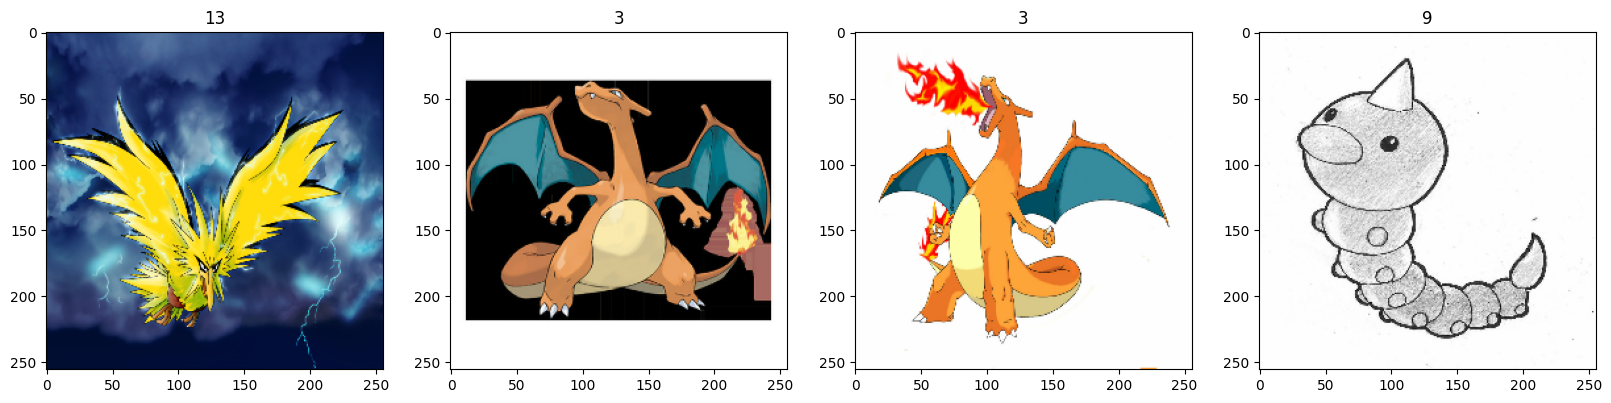

In [5]:
data = tf.keras.utils.image_dataset_from_directory('./data/pokemon')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
   
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

In [6]:
data = data.map(lambda x,y: (x/255, y))
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
data.as_numpy_iterator().next()


(array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [9]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [10]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(14, activation='sigmoid'))

In [8]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
hist = model.fit(train, epochs=1, validation_data=val)

44/44 [==============================] - 29s 645ms/step - loss: 7.2873e-04 - accuracy: 1.0000 - val_loss: 0.1780 - val_accuracy: 0.9563


In [57]:
pip install wget


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=d99149665138df6844984c6b1549eeeff23b9f092fcb75129868c853c317fd63
  Stored in directory: c:\users\soori\appdata\local\pip\cache\wheels\40\b3\0f\a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


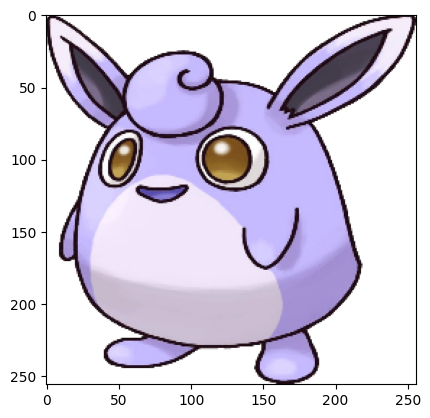

1/1 [==============================] - 0s 124ms/step


'Wigglytuff'

In [64]:
import cv2
img = cv2.imread('./00000006.png')
resize = tf.image.resize(img, (256,256))
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
# plt.imshow(batch[0][15].astype(int))
plt.show()
# yhat = model.predict(batch[0][15].astype(int).reshape(1,256, 256, 3))
yhat = model.predict(np.expand_dims(resize/255, 0))
y_classes = [np.argmax(element) for element in yhat]
classname=['Arbok', 'Arcanine', 'Beedrill', 'Charizard', 'Charmeleon', 'Rhyhorn', 'Snorlax', 'Tentacruel', 'Vaporeon', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Zapdos']

classname[y_classes[0]]




In [65]:
from tensorflow.keras.models import load_model
model.save(os.path.join('modal','imageclassifier.h5'))


c:\Users\soori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


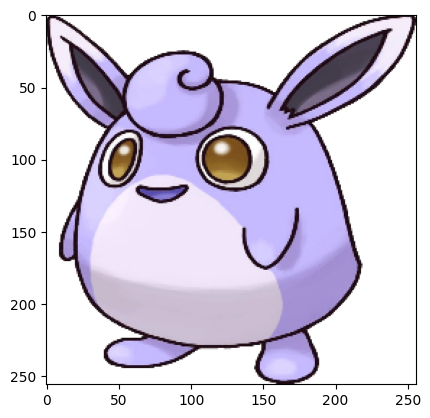

1/1 [==============================] - 0s 139ms/step


In [66]:
new_model = load_model('./modal/imageclassifier.h5')
import cv2
import cv2,wget



image = Image.open(requests.get(url, stream=True).raw)
img = cv2.imread('./00000006.png')
resize = tf.image.resize(img, (256,256))
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
# plt.imshow(batch[0][15].astype(int))
plt.show()
yhat=new_model.predict(np.expand_dims(resize/255, 0))

In [75]:
import requests
url="https://firebasestorage.googleapis.com/v0/b/chatting-f443f.appspot.com/o/S3cnBKW0TRWbAWqEAR58EDXopNV2%2Fbf9d4521-0dc6-4063-86b6-83392279252d.jpeg?alt=media&token=1a2936b3-c2d5-4483-963c-a59f22198a2c"
response = requests.get(url)
if response.status_code == 200:
    with open("downloaded_image.jpg", 'wb') as f:
        f.write(response.content)
else:
    print("Failed to download the image")
    exit()

1/1 [==============================] - 0s 430ms/step


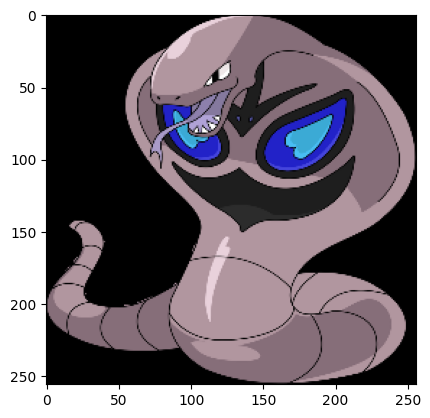

In [81]:
import cv2

# Read the downloaded image
img = cv2.imread("./00000003.png")
resize = tf.image.resize(img, (256,256))
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
yhat=new_model.predict(np.expand_dims(resize/255, 0))

In [82]:
y_classes = [np.argmax(element) for element in yhat]
classname=['Arbok', 'Arcanine', 'Beedrill', 'Charizard', 'Charmeleon', 'Rhyhorn', 'Snorlax', 'Tentacruel', 'Vaporeon', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Zapdos']

classname[y_classes[0]]

'Arbok'